In [2]:
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
import os
import cv2
import numpy as np

def preprocess_batch(filenames, dataset_path, net, image_size):
    images = []
    labels = []
    
    for filename in filenames:
        image_path = os.path.join(dataset_path, filename)
        img = cv2.imread(image_path)
        
        if img is None:
            continue
        
        blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
                (startX, startY, endX, endY) = box.astype("int")
                
                face = img[startY:endY, startX:endX]
                face = cv2.resize(face, image_size)
                face = face.astype("float") / 255.0
                
                images.append(face)
                label = filename.split('_')[1]  # Adjust based on the required label (age/gender/race)
                labels.append(label)
                
    return images, labels

def preprocessing(dataset_path, batch_size=100):
    prototxt_path = 'deploy.prototxt'
    model_path = 'res10_300x300_ssd_iter_140000.caffemodel'
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

    image_size = (96, 96)
    images = []
    labels = []

    all_filenames = [f for f in os.listdir(dataset_path) if f.endswith(".jpg")]
    total_files = len(all_filenames)
    
    for i in range(0, total_files, batch_size):
        batch_filenames = all_filenames[i:i + batch_size]
        batch_images, batch_labels = preprocess_batch(batch_filenames, dataset_path, net, image_size)
        images.extend(batch_images)
        labels.extend(batch_labels)
        
        print(f"Processed {min(i + batch_size, total_files)} / {total_files}")

    images = np.array(images)
    labels = np.array(labels, dtype=int)
    
    return images, labels

# import os
# import cv2
# def preprocessing(dataset_path):
#     prototxt_path = 'deploy.prototxt'
#     model_path = 'res10_300x300_ssd_iter_140000.caffemodel'
#     net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

#     labels = []
#     image = []
#     c=0
#     # Define image dimensions
#     image_size = (96, 96)

#     # Iterate through all images in the dataset directory
#     for filename in os.listdir(dataset_path):
#         if filename.endswith(".jpg"):
#             # Load the image
#             image_path = os.path.join(dataset_path, filename)
#             img = cv2.imread(image_path)
#             # Resize the image for face detection
#             blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
#             # Pass the blob through the network to detect faces
#             net.setInput(blob)
#             detections = net.forward()
#             # Iterate over the detections
#             for i in range(detections.shape[2]):
#                 confidence = detections[0, 0, i, 2]
#                 # print(confidence)
#                 # If confidence is above a certain threshold, extract face region
#                 if confidence > 0.5:
#                     box = detections[0, 0, i, 3:7] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
    #                 (startX, startY, endX, endY) = box.astype("int")
    #                 # Extract face region and resize
    #                 face = img[startY:endY, startX:endX]
    #                 face = cv2.resize(face, image_size)
    #                 # Normalize the image to the range [0, 1]
    #                 face = face.astype("float") / 255.0
    #                 # Append the face region to the data list
    #                 image.append(face)
    #                 # Extract the label from the filename (assuming the format is age_gender_race_date.jpg)
    #                 label = filename.split('_')[1]  # Adjust based on the required label (age/gender/race)
    #                 # Append the label to the labels list
    #                 labels.append(label)
    #                 c+=1
    #                 if(c%100 == 1):
    #                     print(c)
    # # Convet the data and labels to NumPy arrays
    # image =np.array(data)
    # labels = np.array(labels, dtype=int)
    # return image, labels




In [102]:
images, labels = preprocessing('.\dataset')

Processed 100 / 22358
Processed 200 / 22358
Processed 300 / 22358
Processed 400 / 22358
Processed 500 / 22358
Processed 600 / 22358
Processed 700 / 22358
Processed 800 / 22358
Processed 900 / 22358
Processed 1000 / 22358
Processed 1100 / 22358
Processed 1200 / 22358
Processed 1300 / 22358
Processed 1400 / 22358
Processed 1500 / 22358
Processed 1600 / 22358
Processed 1700 / 22358
Processed 1800 / 22358
Processed 1900 / 22358
Processed 2000 / 22358
Processed 2100 / 22358
Processed 2200 / 22358
Processed 2300 / 22358
Processed 2400 / 22358
Processed 2500 / 22358
Processed 2600 / 22358
Processed 2700 / 22358
Processed 2800 / 22358
Processed 2900 / 22358
Processed 3000 / 22358
Processed 3100 / 22358
Processed 3200 / 22358
Processed 3300 / 22358
Processed 3400 / 22358
Processed 3500 / 22358
Processed 3600 / 22358
Processed 3700 / 22358
Processed 3800 / 22358
Processed 3900 / 22358
Processed 4000 / 22358
Processed 4100 / 22358
Processed 4200 / 22358
Processed 4300 / 22358
Processed 4400 / 223

In [103]:
# Split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shape of the datasets
print(f"Training data shape: {trainX.shape}")
print(f"Testing data shape: {testX.shape}")
print(f"Training labels shape: {trainY.shape}")
print(f"Testing labels shape: {testY.shape}")


Training data shape: (18234, 96, 96, 3)
Testing data shape: (4559, 96, 96, 3)
Training labels shape: (18234,)
Testing labels shape: (4559,)


In [104]:
# plt.imshow(cv2.cvtColor(trainX[1610], cv2.COLOR_BGR2RGB))
# plt.show()
y_train=[]
y_test=[]
for i in trainY:
    if(i==1):
        label=[0,1]
    else:
        label=[1,0]
    y_train.append(label)
for i in testY:
    if(i==1):
        label=[0,1]
    else:
        label=[1,0]
    y_test.append(label)
y_train=np.array(y_train)
y_test=np.array(y_test)
# testY

In [105]:
# Define the model
base_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# # Add custom layers on top of the base model
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)              #tried this model worked too slow for me, 2 hours for epoch training
# x = Dropout(0.5)(x)                                and accuarcy also not too high
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(32, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(16, activation='relu')(x)
# x = Dropout(0.5)(x)

# # Add the output layer for classification (assuming binary classification for masked/unmasked faces)
# predictions = Dense(1, activation='sigmoid')(x)

# # Define the complete model
# model = Model(inputs=base_model.input, outputs=predictions)

c:\Users\Parnika Mittal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
base_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [107]:
#Model Training
base_model.fit(trainX,y_train, batch_size=60, epochs=10, validation_data=(testX, y_test))
base_model.save('Gender_Model.keras')

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 64s 202ms/step - accuracy: 0.6890 - loss: 0.5819 - val_accuracy: 0.8186 - val_loss: 0.3978
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 59s 193ms/step - accuracy: 0.8224 - loss: 0.4069 - val_accuracy: 0.8368 - val_loss: 0.3498
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.8429 - loss: 0.3591 - val_accuracy: 0.8561 - val_loss: 0.3166
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.8516 - loss: 0.3367 - val_accuracy: 0.8699 - val_loss: 0.2993
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.8668 - loss: 0.3095 - val_accuracy: 0.8737 - val_loss: 0.2807
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 61s 199ms/step - accuracy: 0.8735 - loss: 0.2895 - val_accuracy: 0.8649 - val_loss: 0.2929
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 65s 212ms/step - accuracy: 0.8845 - loss: 0.2728 - val_accuracy: 0.8837 - val_loss: 0.2708
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 64s 210ms/step - accuracy: 0.8903 - loss: 0

In [133]:
net=cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel')
# Load Haar Cascade model for face detection
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Function to preprocess images using Haar cascades to extract eyes region
# def preprocess_image(image_path):
#     img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
#     if len(eyes) > 0:
#         x, y, w, h = eyes[0]
#         eye_img = img[y:y+h, x:x+w]
#         eye_img = cv2.resize(eye_img, (96, 96))
#         return eye_img
#     else:
#         return None

# gave very low accuracy through haar cascade


In [144]:
# def predict_gender(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
#     c=0

#     if len(faces) == 0:
#         return None, "No face detected"

    # max_confidence = -1
    # best_gender_prediction = None
    # best_gender_label = None

    # for (x, y, w, h) in faces:
    #     face_box = (x, y, x + w, y + h)
    #     features = extract_features(image, face_box)
    #     features = np.expand_dims(features, axis=0)  # Add batch dimension
    #     features = features / 255.0  # Normalize pixel values

    #     gender_preds = base_model.predict(features)
    #     gender_label = 'Male' if gender_preds[0] < 0.5 else 'Female'
    #     confidence = gender_preds[0] if gender_label == 'Female' else 1 - gender_preds[0]
    #     c+=1

    #     if confidence > max_confidence:
    #         print(c)
    #         max_confidence = confidence
    #         best_gender_prediction = gender_preds
    #         best_gender_label = gender_label

    # return best_gender_prediction, best_gender_label

def predict_gender(image):
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    max=detections[0,0,0,2]
    c=0
    gender=''
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence >=0.5:
            face_box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (X_i, Y_i, X_f, Y_f) = face_box.astype("int")
            face=image[Y_i:Y_f, X_i:X_f]
             #extracting upper half eye and forehead feature
            height, width = face.shape[:2]
            eyes_region = face[:height//2, :]
            # Resizing the eye area to our input size
            features = cv2.resize(eyes_region, (96, 96))
            # cv2.imwrite('Eye Region',features)
            # plt.imshow(cv2.cvtColor(features, cv2.COLOR_BGR2RGB))
            # plt.show()
            # cv2.imshow(features, mat=MatLike)
            features = np.expand_dims(features, axis=0)  
            features = features / 255.0  
            #gender predicition
            gender_preds = base_model.predict(features)
            if(gender_preds[0][0]>0.5):
                gender='Male'
            else:
                gender='Female'
            # print(gender_preds)
            c+=1

        # elif(c==0):
        #     print("Low confidence for detection")

    return gender

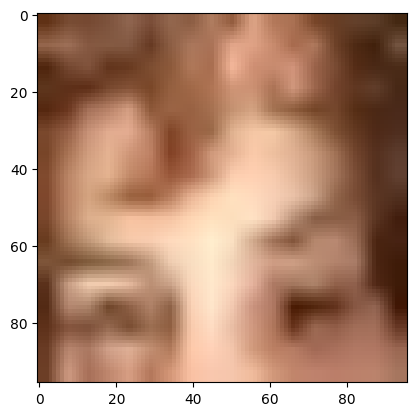

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Female


In [138]:
img_path=r"D:\ESC4\pclub_task3\cropped_face.jpg"
image = cv2.imread(img_path)
result= predict_gender(image)
print(result)

In [150]:
test_path=r'D:\ESC4\pclub_task3\testing data'
c=0
for filename in os.listdir(test_path):
    img_path=os.path.join(test_path, filename)
    image=cv2.imread(img_path)
    if filename.endswith('.jpg'):
        label=int(filename.split('_')[0])
        
        gender=predict_gender(image)
        print(gender,label)
        if label==0 and gender=='Male':
            c+=1
        elif label==1 and gender=='Female':
            c+=1
print(c)
testing_accuracy=c/151.0
print(testing_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Female 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Male 0
 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Male 0
 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Male 0
 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Female 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Female 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Female 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Female 0
 0
 0
 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Male 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Female 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━

In [152]:
import gradio as gr

gender=gr.Interface(fn=predict_gender, inputs=gr.Image(), outputs=gr.Textbox())
gender.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.15.0, however version 4.29.0 is available, please upgrade.
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
